# Laplace spectral analysis


In [1]:

import vedo
import napari_shape_odyssey as nso
import napari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold, cluster

In [2]:
viewer = napari.Viewer(ndisplay=3)

In [7]:
mesh = vedo.Ellipsoid().triangulate().clean()
viewer.add_surface((mesh.points(), np.asarray(mesh.faces())), name="ellipsoid")

<Surface layer 'ellipsoid' at 0x21b8ccb6a60>

## Shape spectrum

The laplacian eigenvalue spectrum of a shape is a signature of its geometry. It is invariant to translation, rotation and scaling. It is also robust to noise and outliers. It is therefore a very useful tool for shape analysis.

In [9]:
eigenvectors, eigenvalues = nso.spectral.shape_fingerprint(viewer.layers[0].data)
feature_table = pd.DataFrame(
    eigenvectors, columns=[f"eigenvector_{i}" for i in range(100)]
)

viewer.layers[0].features = feature_table
viewer.layers[0].features.head()

,eigenvector_0,eigenvector_1,eigenvector_2,eigenvector_3,eigenvector_4,eigenvector_5,eigenvector_6,eigenvector_7,eigenvector_8,eigenvector_9,...,eigenvector_90,eigenvector_91,eigenvector_92,eigenvector_93,eigenvector_94,eigenvector_95,eigenvector_96,eigenvector_97,eigenvector_98,eigenvector_99
0,-0.286584,0.466006,2.914393e-06,-2.670153e-02,-0.564916,1.980246e-05,6.031942e-02,0.027270,-0.637259,0.015060,...,-1.837822e-02,-4.096932e-02,2.456711e-03,-0.753308,-3.639717e-01,-9.137496e-02,0.012351,-0.033560,-0.008964,-0.070424
1,-0.286584,0.466010,-6.219595e-03,-2.646580e-02,-0.564921,1.376339e-02,5.980559e-02,0.027405,-0.637245,0.014265,...,-2.121618e-02,-4.241061e-02,2.913675e-04,-0.750394,-3.410896e-01,-1.745569e-01,-0.008940,-0.054190,-0.009444,-0.074741
2,-0.286584,0.467152,2.449732e-16,-2.314927e-15,-0.569310,-2.934374e-16,2.109721e-15,0.028478,-0.647039,0.015295,...,-1.671580e-14,4.440892e-16,-3.640976e-13,-0.871737,3.683165e-14,5.766221e-15,0.015152,-0.039711,-0.011303,-0.114793
3,-0.286584,0.465962,-1.232598e-02,-2.576202e-02,-0.564696,2.724772e-02,5.822571e-02,0.027763,-0.636629,0.013541,...,-2.366231e-02,-4.439061e-02,-1.726597e-03,-0.737174,-3.103782e-01,-2.539173e-01,-0.027743,-0.072156,-0.009965,-0.086762
4,-0.286584,0.465869,-1.821425e-02,-2.460630e-02,-0.564280,4.024184e-02,5.561764e-02,0.028305,-0.635514,0.012927,...,-2.563604e-02,-4.655387e-02,-3.572047e-03,-0.715752,-2.730462e-01,-3.272970e-01,-0.042911,-0.086394,-0.010480,-0.104977


Let's visualize some of the eigenvectors of the Laplacian matrix. The eigenvectors are ordered by their corresponding eigenvalues, so the first eigenvector corresponds to the smallest eigenvalue, and the last eigenvector corresponds to the largest eigenvalue. We will visualize the first 5 eigenvectors on the surface of the object.

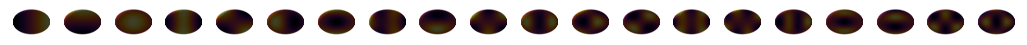

In [12]:
n_visualizations = 20
fig, axes = plt.subplots(ncols=n_visualizations, figsize=(13, 7))
for i in range(1, n_visualizations+1):
    mesh_tuple = (mesh.points(), np.asarray(mesh.faces()), eigenvectors[:,i])
    viewer.add_surface(mesh_tuple, colormap='inferno')

    screenshot = viewer.screenshot()
    axes[i-1].imshow(screenshot)
    axes[i-1].axis('off')

Text(0.5, 1.0, 'Eigenvalue spectrum')

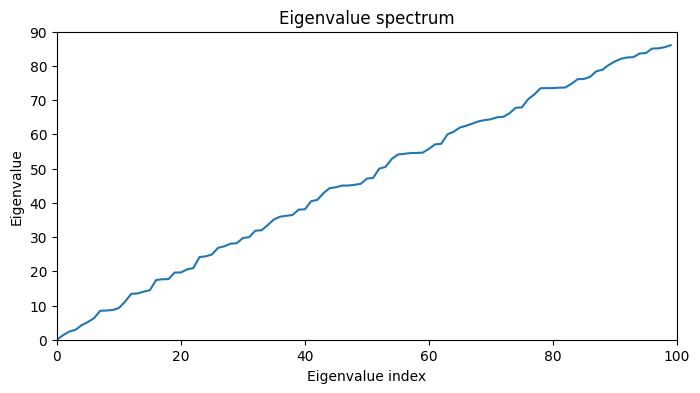

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(np.arange(0, 100), eigenvalues, label='Eigenvalu spectrum')
ax.set_xlim(0, 100)
ax.set_ylim(0, 90)
ax.set_xlabel('Eigenvalue index')
ax.set_ylabel('Eigenvalue')
ax.set_title('Eigenvalue spectrum')

## Simple shapes

We can also compare the shape spectra of several basic shapes (e.g. ellipsoid of various eccentricities, sphere, cube, etc.) to see how the shape of the object affects the shape spectrum.

In [14]:
ellipsoid1 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,1,0), axis3=(0,0,1), c='r', alpha=0.5).triangulate().clean()
ellipsoid2 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,1,0), axis3=(0,0,2), c='r', alpha=0.5).triangulate().clean()
ellipsoid3 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,2,0), axis3=(0,0,2), c='r', alpha=0.5).triangulate().clean()
cube = vedo.Cube(pos=(0,0,0), side=1, c='b', alpha=0.5).triangulate().clean().subdivide(method=1, n=3)

ellipsoid1.name = 'ellipsoid1'
ellipsoid2.name = 'ellipsoid2'
ellipsoid3.name = 'ellipsoid3'
shapes = [ellipsoid1, ellipsoid2, ellipsoid3, cube]

Let's have a look at how the different orders of the spectra are expressed on our example meshes. For the sake of speed, we don't go to very high orders here:

In [15]:
order = 50

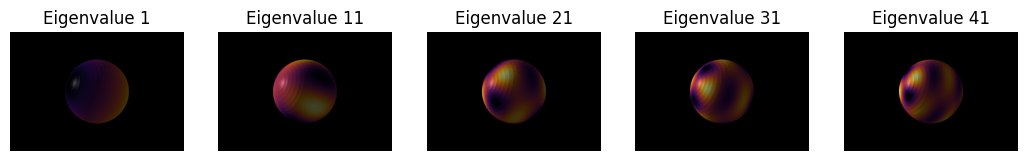

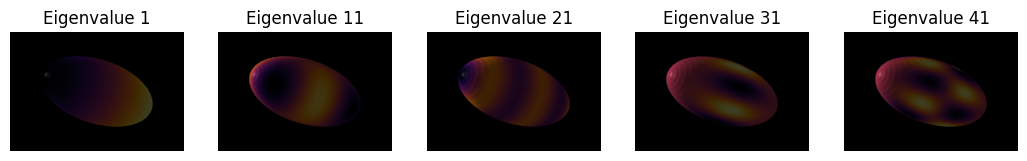

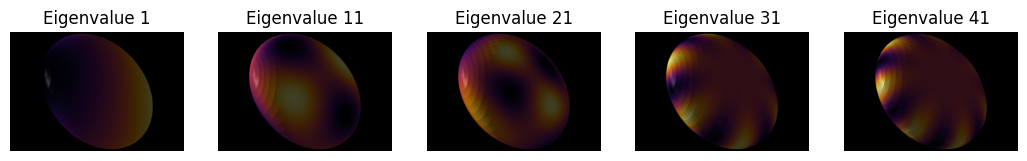

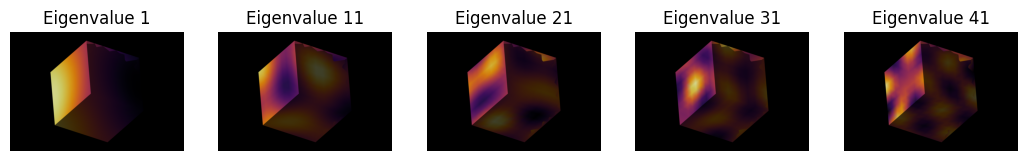

In [159]:
for shape in shapes:
    fig, axes = plt.subplots(ncols=n_visualizations, figsize=(13, 7))
    for i, i_order in enumerate(np.arange(1, 50, 10)):
        eigenvectors, eigenvalues = nso.spectral.shape_fingerprint((shape.points(), shape.faces()), order)
        mesh_tuple = (shape.points(), np.asarray(shape.faces()), eigenvectors[:, i_order])
        layer = viewer.add_surface(mesh_tuple, colormap='inferno')
        viewer.camera.angles = (-18, -30, 130)
        viewer.camera.zoom = 710
        screenshot = viewer.screenshot()
        viewer.layers.remove(layer)
        axes[i].imshow(screenshot)
        axes[i].axis('off')
        axes[i].set_title(f'Eigenvalue {i_order}')

## more complex shapes

With that out of the way, let's look at some more complex shapes:

In [17]:
shape1 = vedo.load(vedo.dataurl+"bunny.obj").triangulate().clean().scale(10)
shape2 = vedo.load(vedo.dataurl+"cessna.vtk").triangulate().clean()
shape3 = vedo.load(vedo.dataurl+"teapot.vtk").triangulate().clean()
shape4 = vedo.load(vedo.dataurl+"cow.vtk").triangulate().clean().scale(2)
shapes = [shape1, shape2, shape3, shape4]

Interestingly, we see that the lower order modes can tell us a lot about the basic compontents and the connectedness of the mesh:

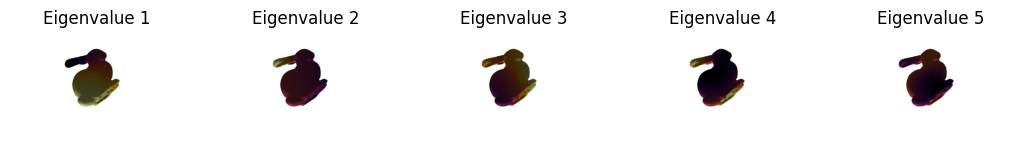

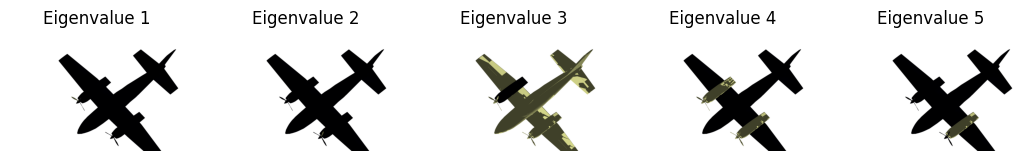

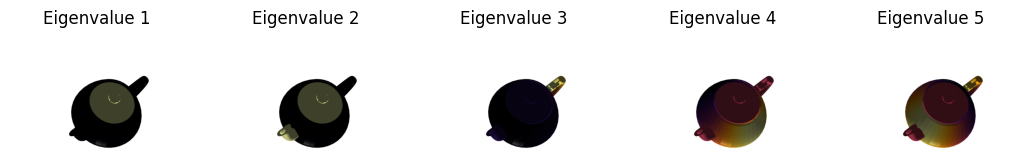

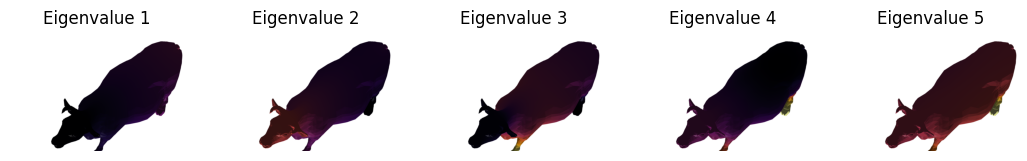

In [182]:
for shape in shapes:
    fig, axes = plt.subplots(ncols=n_visualizations, figsize=(13, 7))
    eigenvectors, eigenvalues = nso.spectral.shape_fingerprint((shape.points(), shape.faces()), order)
    
    for i, i_order in enumerate(np.arange(1, 6, 1)):
        mesh_tuple = (shape.points(), np.asarray(shape.faces()), eigenvectors[:, i_order])
        layer = viewer.add_surface(mesh_tuple, colormap='inferno')
        viewer.camera.angles = (64, 60, -67)
        viewer.camera.zoom = 400
        viewer.camera.center = (-0.175, 0.621, -0.119)
        screenshot = viewer.screenshot()
        layer.visible = False
        axes[i].imshow(screenshot)
        axes[i].axis('off')
        axes[i].set_title(f'Eigenvalue {i_order}')

If we go to the higher orders we are back to seing expressions of local and global shape:

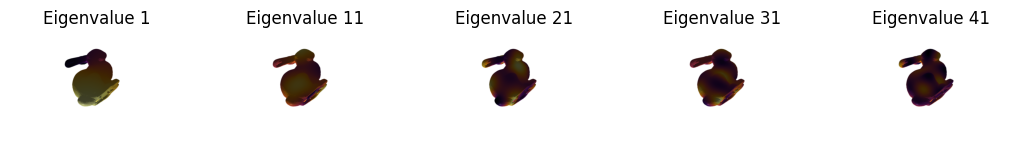

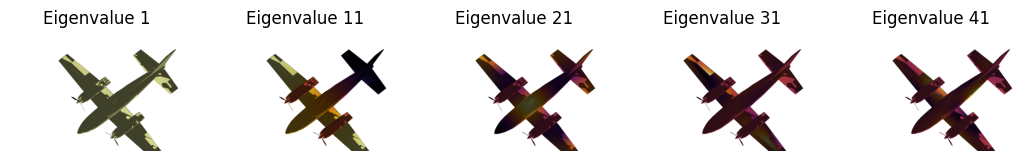

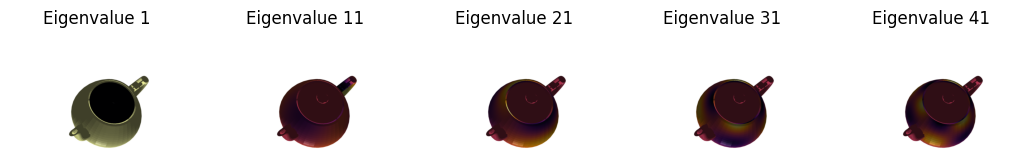

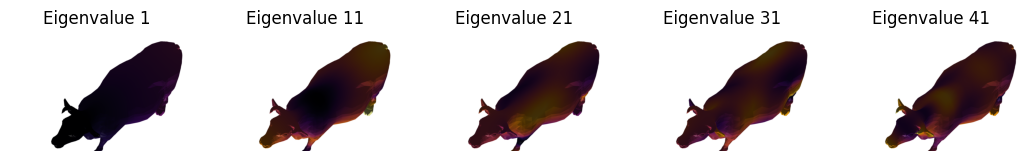

In [183]:
for shape in shapes:
    fig, axes = plt.subplots(ncols=n_visualizations, figsize=(13, 7))
    eigenvectors, eigenvalues = nso.spectral.shape_fingerprint((shape.points(), shape.faces()), order)
    
    for i, i_order in enumerate(np.arange(1, 50, 10)):
        mesh_tuple = (shape.points(), np.asarray(shape.faces()), eigenvectors[:, i_order])
        layer = viewer.add_surface(mesh_tuple, colormap='inferno')
        viewer.camera.angles = (64, 60, -67)
        viewer.camera.zoom = 400
        viewer.camera.center = (-0.175, 0.621, -0.119)
        screenshot = viewer.screenshot()
        layer.visible = False
        axes[i].imshow(screenshot)
        axes[i].axis('off')
        axes[i].set_title(f'Eigenvalue {i_order}')

## Application: Clustering

Let's have a closer look at the cow example and see what the eigenvectors can tell us if we throw them into a clustering algorithm:

In [18]:
cow = vedo.load(vedo.dataurl+"cow.vtk").triangulate().clean().scale(2)
eigenvectors, eigenvalues = nso.spectral.shape_fingerprint((cow.points(), cow.faces()), order)

df = pd.DataFrame(eigenvectors, columns=[f"eigenvector_{i}" for i in range(eigenvectors.shape[1])])

In [20]:
layer = viewer.add_surface((cow.points(), np.asarray(cow.faces())))
layer.features = df

<Axes: >

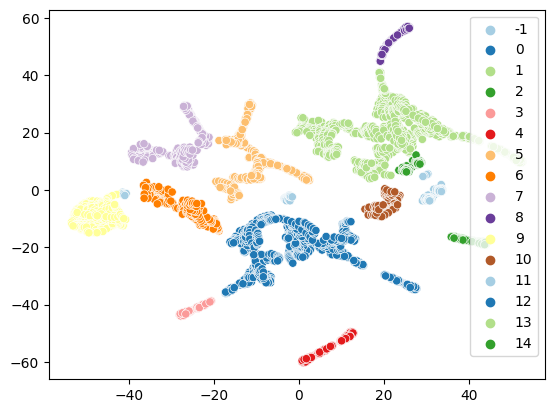

In [243]:
reducer = manifold.TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=0)
embedding = reducer.fit_transform(df)
clusterer = cluster.DBSCAN(eps=3, min_samples=20)
clusterer.fit(embedding)

# Plot the clusters
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=clusterer.labels_, palette='Paired')

It may make a bit more sense in this case to cluster in higher-dimensional space since we can directly visualize on the surface and are not depending on finding a 2D projection of the cluster labels. We find that the clustering already gets a few thing quite right, such as the segmentation of the horns and the ears or assigning a single class for the whole rump of the cow:

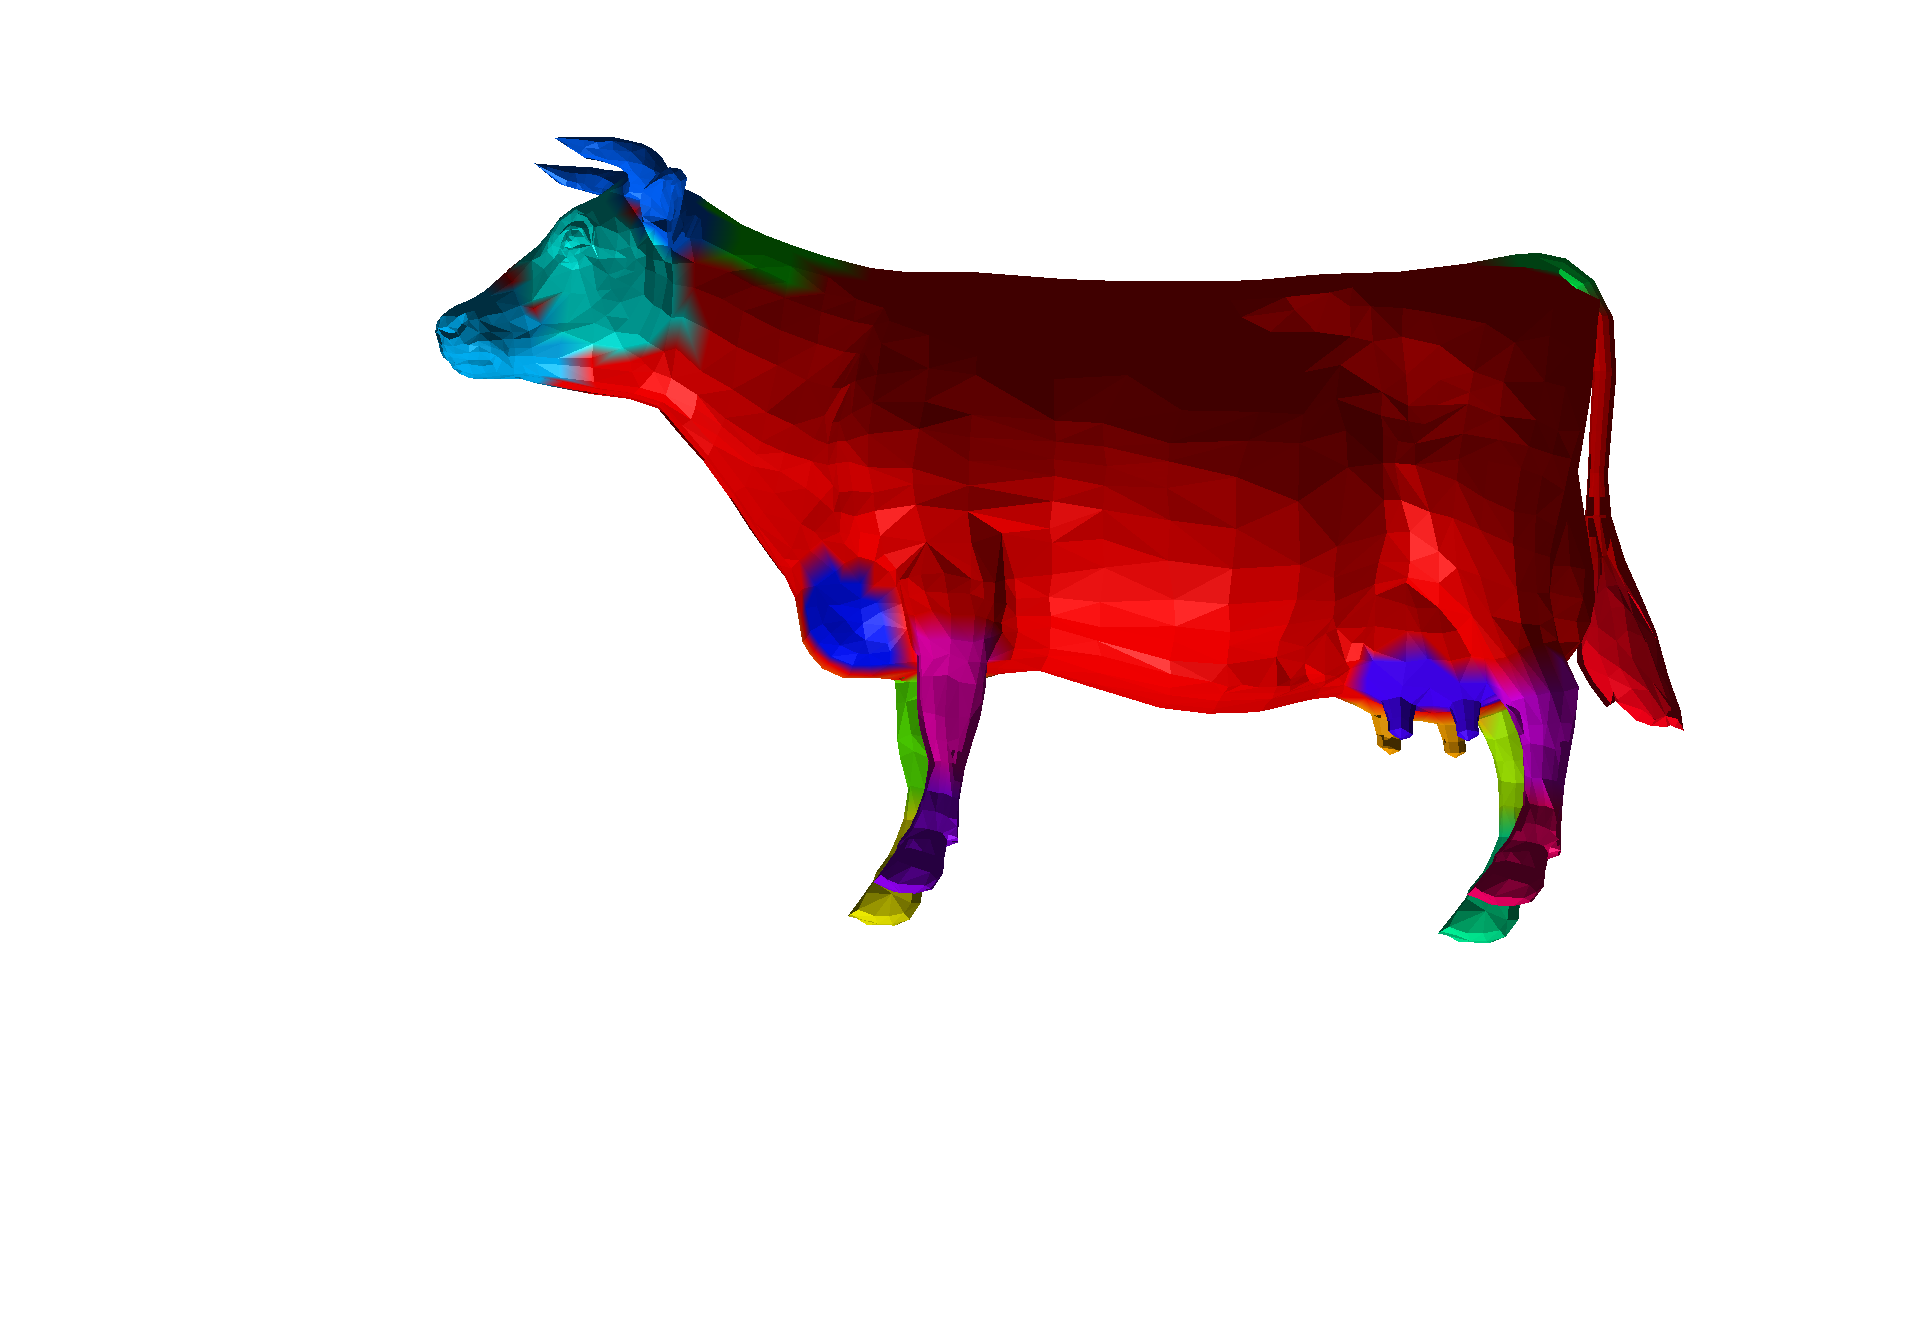

In [237]:
clusterer = cluster.DBSCAN(eps=0.5, min_samples=20)
clusterer.fit(df)
viewer.add_surface((cow.points(), np.asarray(cow.faces()), clusterer.labels_), colormap='hsv')
viewer.camera.center = (-0.21, 3.7, -0.15)
viewer.camera.zoom = 240
viewer.camera.angles = (90, -8, -6)

napari.utils.nbscreenshot(viewer, canvas_only=True)